In [138]:
import numpy as np
import numpy.linalg as linalg

import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [130]:
def regression_model(x, y, order=1):
    X = np.zeros((len(x), order+1))
    
    for n in range(order+1):
        X[:, n] = np.power(x[:, 0], n)
        
    beta = linalg.inv(X.T @ X).dot(X.T).dot(y)
    
    return beta, X @ beta

In [137]:
x = np.random.rand(100, 1)
y = 2.0 + 5*x*x + 0.1*np.random.randn(100, 1)

poly = PolynomialFeatures(degree=2)
X = poly.fit_transform(x)

clf = LinearRegression()
clf.fit(X, y)
y_pred2 = clf.predict(X)

beta_pred, y_pred = regression_model(x, y, order=2)

In [135]:
print("My implementation:")
print("Mean squared error: %.6f" % mean_squared_error(y, y_pred))
print('Variance score: %.6f' % r2_score(y, y_pred))
print('Mean absolute error: %.6f' % mean_absolute_error(y, y_pred))
print()

print("sklearn:")
print("Mean squared error: %.6f" % mean_squared_error(y, y_pred2))
print('Variance score: %.6f' % r2_score(y, y_pred2))
print('Mean absolute error: %.6f' % mean_absolute_error(y, y_pred2))

My implementation:
Mean squared error: 0.011557
Variance score: 0.994854
Mean absolute error: 0.084929

sklearn:
Mean squared error: 0.011557
Variance score: 0.994854
Mean absolute error: 0.084929


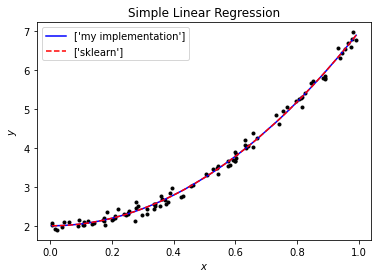

In [133]:
plt.figure(1)

plt.plot(x, y, '.k')
plt.plot(np.sort(x, axis=0), np.sort(y_pred, axis=0), 
         '-b', label=["my implementation"])
plt.plot(np.sort(x, axis=0), np.sort(y_pred2, axis=0), 
         '--r', label=["sklearn"])

plt.xlabel(r"$x$")
plt.ylabel(r"$y$")
plt.title("Simple Linear Regression")

plt.legend()
plt.show()

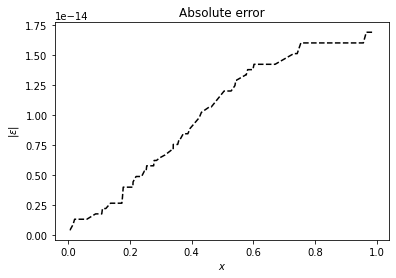

In [134]:
plt.figure(1)

plt.plot(np.sort(x, axis=0), 
         np.sort(np.abs(y_pred - y_pred2), axis=0), 
         '--k')

plt.xlabel(r"$x$")
plt.ylabel(r"$ |\epsilon| $")
plt.title("Absolute error")

plt.show()